In [1]:
import numpy as np
import awkward as ak
import hist
import warnings
import pickle
from coffea.ml_tools.torch_wrapper import torch_wrapper
import matplotlib.pyplot as plt
import hist
from sklearn.metrics import roc_curve, auc
import math
import os
import uproot
import json
import math

In [2]:
with open('../../jsons/subregion_event_totals.json', 'r') as f:
    totals = json.load(f)
with open('../../jsons/my_xsecs.json', 'r') as f:
    xsecs = json.load(f)

In [3]:
totals_x = {}
for i in totals:
    if type(totals[i]) == dict:
        totals_x[i] = {}
        for j in totals[i]:
            totals_x[i][f'{i}_{j}'] = totals[i][j]
    else:
        totals_x[i] = totals[i]

In [4]:
hgg = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/hgg.parquet')
hbb = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/hbb.parquet')
singletop = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/singletop.parquet')
ww = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/ww.parquet')
wz = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/wz.parquet')
zz = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/zz.parquet')

In [5]:
qcd = {}
#qcd['qcd_300to470'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_300to470.parquet')
qcd['qcd_470to600'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_470to600.parquet')
qcd['qcd_600to800'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_600to800.parquet')
qcd['qcd_800to1000'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_800to1000.parquet')
qcd['qcd_1000to1400'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_1000to1400.parquet')
qcd['qcd_1400to1800'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_1400to1800.parquet')
qcd['qcd_1800to2400'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_1800to2400.parquet')
qcd['qcd_2400to3200'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_2400to3200.parquet')
qcd['qcd_3200toInf'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/qcd_3200toInf.parquet')

In [6]:
wqq = {}
#wqq['wqq_200to400'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/wqq_200to400.parquet')
wqq['wqq_400to600'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/wqq_400to600.parquet')
wqq['wqq_600to800'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/wqq_600to800.parquet')
wqq['wqq_800toInf'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/wqq_800toInf.parquet')

In [7]:
zqq = {}
#zqq['zqq_200to400'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/zqq_200to400.parquet')
zqq['zqq_400to600'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/zqq_400to600.parquet')
zqq['zqq_600to800'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/zqq_600to800.parquet')
zqq['zqq_800toInf'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/zqq_800toInf.parquet')

In [8]:
ttboosted = {}
ttboosted['ttboosted_700to1000'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/ttboosted_700to1000.parquet')
ttboosted['ttboosted_1000toInf'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/ttboosted_1000toInf.parquet')

In [9]:
mc = {}
mc['hgg'] = hgg
mc['hbb'] = hbb
mc['singletop'] = singletop
mc['ww'] = ww
mc['wz'] = wz
mc['zz'] = zz
mc['qcd'] = qcd
mc['wqq'] = wqq
mc['zqq'] = zqq
mc['ttboosted'] = ttboosted

In [10]:
for i in mc:
    if type(mc[i]) == dict:
        for j in mc[i]:
            mc[i][j] = mc[i][j][(ak.any(mc[i][j].pt > 450, axis=1))]
    else:
        mc[i] = mc[i][ak.any(mc[i].pt > 450, axis=1)]

for i in mc:
    if type(mc[i]) == dict:
        for j in mc[i]:
            mc[i][j] = mc[i][j][(ak.any(mc[i][j].pt < 600, axis=1))]
    else:
        mc[i] = mc[i][ak.any(mc[i].pt < 600, axis=1)]

In [11]:
data = {}
data['B'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/SingleMuon_B.parquet')
data['C'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/SingleMuon_C.parquet')
data['D'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/SingleMuon_D.parquet')
data['E'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/SingleMuon_E.parquet')
data['F'] = ak.from_parquet('/project01/ndcms/cmoore24/skims/ecfs/singlemuon/single_parquets/SingleMuon_F.parquet')

for i in data:
    if type(data[i]) == dict:
        for j in data[i]:
            data[i][j] = data[i][j][(ak.any(data[i][j].pt > 450, axis=1))]
    else:
        data[i] = data[i][ak.any(data[i].pt > 450, axis=1)]

for i in data:
    if type(data[i]) == dict:
        for j in data[i]:
            data[i][j] = data[i][j][(ak.any(data[i][j].pt < 600, axis=1))]
    else:
        data[i] = data[i][ak.any(data[i].pt < 600, axis=1)]

data_arr = ak.concatenate([data['B'], data['C'], data['D'], data['E'], data['F']])

In [12]:
with open('/scratch365/cmoore24/training/hgg/binary/ecfs_project/ratios_equal0.pkl', 'rb') as f:
    ecf_elist0 = pickle.load(f)
with open('/scratch365/cmoore24/training/hgg/binary/ecfs_project/ratios_equal1.pkl', 'rb') as f:
    ecf_elist1 = pickle.load(f)
with open('/scratch365/cmoore24/training/hgg/binary/ecfs_project/ratios_equal2.pkl', 'rb') as f:
    ecf_elist2 = pickle.load(f)

In [13]:
with open('/scratch365/cmoore24/training/hgg/binary/ecfs_project/ratios0.pkl', 'rb') as f:
    ecf_list0 = pickle.load(f)
with open('/scratch365/cmoore24/training/hgg/binary/ecfs_project/ratios1.pkl', 'rb') as f:
    ecf_list1 = pickle.load(f)
with open('/scratch365/cmoore24/training/hgg/binary/ecfs_project/ratios2.pkl', 'rb') as f:
    ecf_list2 = pickle.load(f)

In [14]:
ecf_list = ecf_list0 + ecf_list1 + ecf_list2 + ecf_elist0 + ecf_elist1 + ecf_elist2

In [15]:
len(ecf_list)

17312

In [16]:
def var_hist(dataset, bins, mini, maxi):
    
    make_hist = hist.Hist.new.Reg(bins, mini, maxi, name='var', label='MC Var').Weight()
    make_hist.fill(var=dataset)
    return make_hist

In [17]:
def round_sig(x, sig=2):
    return round(x, sig-int(math.floor(math.log10(abs(x))))-1)

In [18]:
def find_multiplier(decimal_number):
    decimal_str = str(decimal_number)
    
    if '.' in decimal_str:
        whole_part, fractional_part = decimal_str.split('.')
        if int(fractional_part) == 0:
            return 1
        else:
            decimal_places = len(fractional_part)
    else:
        return 1
    multiplier = 10 ** decimal_places
    return multiplier

In [19]:
def format_float(num):
    return np.format_float_positional(num, trim='-')

In [1260]:
def cal(data):
    data = data[~np.isnan(data)]
    Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 75)
    IQR = Q2 - Q1
    upper_limit = Q2 + 1.5 * IQR
    
    return upper_limit

In [1261]:
IL = 44.99

In [1320]:
ecf = ecf_list[0]
ecf = '3e5^0.5/2e5^1.0**0.75'

In [1321]:
dash = ecf.find('/')
asterisk = ecf.find('*')
numerator = ecf[:dash]
denominator = ecf[dash+1:asterisk]
exponent = float(ecf[asterisk+2:])

In [1322]:
data_ratio = ak.flatten(data_arr.ECFs[numerator] / (data_arr.ECFs[denominator] ** exponent))

/afs/crc.nd.edu/user/c/cmoore24/miniconda3/envs/coffea/lib/python3.11/site-packages/awkward/_nplikes/array_module.py:246: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


In [1323]:
mini = ak.min(data_ratio)
maxi = round_sig(cal(data_ratio))
print(maxi)
mult = find_multiplier(format_float(maxi-mini))
bins = int(math.ceil((maxi-mini) * mult))

18000.0


In [1324]:
bin_adjust = (bins/100)
bins = int(bins/(bin_adjust))

In [1325]:
ecf_hists = {}
for i in mc:
    if type(mc[i]) == dict:
        ecf_hists[i] = {}
        for j in mc[i]:
            ratio = ak.flatten(mc[i][j].ECFs[numerator] / (mc[i][j].ECFs[denominator] ** exponent))
            ecf_hists[i][j] = var_hist(ratio, bins, mini, maxi)
    else:
        ratio = ak.flatten(mc[i].ECFs[numerator] / (mc[i].ECFs[denominator] ** exponent))
        ecf_hists[i] = var_hist(ratio, bins, mini, maxi)

In [1326]:
data_ecf_hist = hist.Hist.new.Reg(bins, mini, maxi, name='var', label='Data Var').Weight()
data_ecf_hist.fill(var=data_ratio);

In [1327]:
scaleHgg = ((IL*(xsecs['hgg']*1000)*0.0817)/(totals['hgg']))
ecf_hists['hgg'].view(flow=True)[:] *= scaleHgg

scaleHbb = ((IL*(xsecs['hbb']*1000)*0.581)/(totals['hbb']))
ecf_hists['hbb'].view(flow=True)[:] *= scaleHbb

In [1328]:
for i in mc:
    if (i == 'hgg') or (i == 'hbb'):
        continue
    else:
        if type(mc[i]) == dict:
            for j in mc[i]:
                scale = ((IL*(xsecs[i][j]*1000))/(totals_x[i][j]))
                ecf_hists[i][j].view(flow=True)[:] *= scale
        else:
            scale = ((IL*(xsecs[i]*1000))/(totals_x[i]))
            ecf_hists[i].view(flow=True)[:] *= scale

In [1329]:
qcd_hist = sum(ecf_hists['qcd'][i] for i in ecf_hists['qcd'])
wqq_hist = sum(ecf_hists['wqq'][i] for i in ecf_hists['wqq'])
zqq_hist = sum(ecf_hists['zqq'][i] for i in ecf_hists['zqq'])
ttboosted_hist = sum(ecf_hists['ttboosted'][i] for i in ecf_hists['ttboosted'])

single_hists = {}
single_hists['qcd'] = qcd_hist
single_hists['wqq'] = wqq_hist
single_hists['zqq'] = zqq_hist
single_hists['ttboosted'] = ttboosted_hist
single_hists['hgg'] = ecf_hists['hgg']
single_hists['hbb'] = ecf_hists['hbb']
single_hists['ww'] = ecf_hists['ww']
single_hists['zz'] = ecf_hists['zz']
single_hists['wz'] = ecf_hists['wz']
single_hists['singletop'] = ecf_hists['singletop']

mc_ecf_hist = sum(single_hists[i] for i in single_hists)

In [1330]:
ks_value = -math.log10(abs(np.cumsum(data_ecf_hist.density() / mult * bin_adjust) - np.cumsum(mc_ecf_hist.density() / mult * bin_adjust)).max())

In [1331]:
np.cumsum((data_ecf_hist.density() / mult) * bin_adjust)

array([7.07751650e-04, 3.16718863e-03, 8.79381425e-03, 1.79061167e-02,
       3.20965373e-02, 5.34175558e-02, 8.14268273e-02, 1.20335474e-01,
       1.63490631e-01, 2.08662880e-01, 2.56294566e-01, 3.03678539e-01,
       3.49169277e-01, 3.92607534e-01, 4.32825522e-01, 4.70230196e-01,
       5.04573845e-01, 5.34405577e-01, 5.61300140e-01, 5.85912203e-01,
       6.08170993e-01, 6.29067360e-01, 6.46230338e-01, 6.62561707e-01,
       6.77265248e-01, 6.91101792e-01, 7.03965179e-01, 7.15996957e-01,
       7.27161739e-01, 7.37778014e-01, 7.47527293e-01, 7.57064246e-01,
       7.66123467e-01, 7.74474937e-01, 7.82118655e-01, 7.90098554e-01,
       7.97264540e-01, 8.03899712e-01, 8.10287170e-01, 8.16692323e-01,
       8.22743599e-01, 8.28777182e-01, 8.34722296e-01, 8.40348922e-01,
       8.45250102e-01, 8.50363607e-01, 8.55123237e-01, 8.59741317e-01,
       8.64093989e-01, 8.68110480e-01, 8.72197746e-01, 8.76568112e-01,
       8.80726153e-01, 8.84813419e-01, 8.88670665e-01, 8.92740237e-01,
      

In [1332]:
ks_value

1.4490547330335262

In [1333]:
ecf_hists = {}
for i in mc:
    if type(mc[i]) == dict:
        ecf_hists[i] = {}
        for j in mc[i]:
            ratio = ak.flatten(mc[i][j].ECFs[numerator] / (mc[i][j].ECFs[denominator] ** exponent))
            ecf_hists[i][j] = var_hist(ratio, 40, mini, maxi)
    else:
        ratio = ak.flatten(mc[i].ECFs[numerator] / (mc[i].ECFs[denominator] ** exponent))
        ecf_hists[i] = var_hist(ratio, 40, mini, maxi)

In [1334]:
data_ecf_hist = hist.Hist.new.Reg(40, mini, maxi, name='var', label='Data Var').Weight()
data_ecf_hist.fill(var=data_ratio);

In [1335]:
scaleHgg = ((IL*(xsecs['hgg']*1000)*0.0817)/(totals['hgg']))
ecf_hists['hgg'].view(flow=True)[:] *= scaleHgg

scaleHbb = ((IL*(xsecs['hbb']*1000)*0.581)/(totals['hbb']))
ecf_hists['hbb'].view(flow=True)[:] *= scaleHbb

In [1336]:
for i in mc:
    if (i == 'hgg') or (i == 'hbb'):
        continue
    else:
        if type(mc[i]) == dict:
            for j in mc[i]:
                scale = ((IL*(xsecs[i][j]*1000))/(totals_x[i][j]))
                ecf_hists[i][j].view(flow=True)[:] *= scale
        else:
            scale = ((IL*(xsecs[i]*1000))/(totals_x[i]))
            ecf_hists[i].view(flow=True)[:] *= scale

In [1337]:
qcd_hist = sum(ecf_hists['qcd'][i] for i in ecf_hists['qcd'])
wqq_hist = sum(ecf_hists['wqq'][i] for i in ecf_hists['wqq'])
zqq_hist = sum(ecf_hists['zqq'][i] for i in ecf_hists['zqq'])
ttboosted_hist = sum(ecf_hists['ttboosted'][i] for i in ecf_hists['ttboosted'])

single_hists = {}
single_hists['qcd'] = qcd_hist
single_hists['wqq'] = wqq_hist
single_hists['zqq'] = zqq_hist
single_hists['ttboosted'] = ttboosted_hist
single_hists['hgg'] = ecf_hists['hgg']
single_hists['hbb'] = ecf_hists['hbb']
single_hists['ww'] = ecf_hists['ww']
single_hists['zz'] = ecf_hists['zz']
single_hists['wz'] = ecf_hists['wz']
single_hists['singletop'] = ecf_hists['singletop']

mc_ecf_hist = sum(single_hists[i] for i in single_hists)

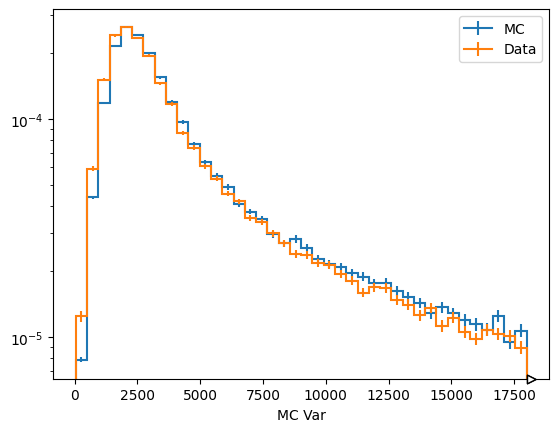

In [1338]:
mc_ecf_hist.plot1d(label='MC', density=True)
data_ecf_hist.plot1d(label='Data', density=True)
plt.legend()
plt.yscale('log')
plt.show()